### 1. Import Modules


In [85]:
%pip install pydot
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Libraries
import os, sys, time, random, cv2, warnings, sklearn
import numpy as npy
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pydot, graphviz

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
warnings.filterwarnings("ignore")

print('Python Version: ', sys.version)


Python Version:  3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]


#### 2. Read images, Create dataframe of image paths, and class labels

In [87]:
path = os.path.curdir
currentdir = os.path.abspath(path)

In [88]:
TRAIN_PATH='dataset/Train_Validation sets/Train_Validation sets'
TEST_PATH='dataset/Independent Test set/Independent Test set'
train_kcn_img_path=TRAIN_PATH +'/Keratoconus'
# train_nor_img_path=TRAIN_PATH +'/Normal'
# train_sus_img_path=TRAIN_PATH +'/Suspect'

# test_kcn_img_path=TEST_PATH +'/Keratoconus'
# test_nor_img_path=TEST_PATH +'/Normal'
# test_sus_img_path=TEST_PATH +'/Suspect'



In [89]:

x=plt.imread(train_kcn_img_path+'/case1/KCN_1_EC_A.jpg')
x.shape

(224, 224, 3)

#### 4.Create Train, Validation, and Test Generators

In [133]:
img_size=(224, 224)
batch_size=32

## Image Data Generator instance. 
# We will be applying transformations to the images so that we are not overtrained on specific orientations or features.
trainValidation_data_generator = ImgDataGen(
                                            #rescale=1./225,
                                            validation_split=0.2    # set the validation split                                
                                            )

# Image Data Generator instance for Test data
test_data_generator = ImgDataGen()

# Set a random seed to synchronize the shuffle order across different runs of the generator
# trainValidation_data_generator.set_seed(42)

# Successfully mapped the train-images to their classes from the dataframe. Now let's do the same for the test-images. 
# Here, I will only be rescaling. No other transformations are applies, to preserve originality of the images.
msg='{0:40s} - Train Set Generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line

## Mapping images to their classes.
train_generator = trainValidation_data_generator.flow_from_directory(
                                                            directory=TRAIN_PATH, 
                                                            target_size=img_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            shuffle=True, 
                                                            subset='training' # set as training data
                                                            # seed=1,
                                                        )
msg='{0:40s} - Validation Set Generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line

## Mapping images to their classes.
validation_generator = trainValidation_data_generator.flow_from_directory(
                                                            directory=TRAIN_PATH, 
                                                            target_size=img_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            shuffle=True, 
                                                            subset='validation' # set as validation data
                                                            # seed=1,
                                                        )

msg='{0:40s} - Test Set Generator'.format(' ')
print(msg, '\r', end='') # prints over on the same line

## Mapping images to their classes.
test_generator = test_data_generator.flow_from_directory(
                                        TEST_PATH, 
                                        target_size=img_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        shuffle=True, 
                                        # seed=1,
                                        batch_size=batch_size
                                        )


# for the test_generator we want to calculate the batch size and test steps such that batch_size X test_steps= number of samples in test set
# this insures that we go through all the sample in the test set exactly once.
# length=train_generator.samples
# test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]  
# # test_batch_size=batch_size
# test_steps=int(length/test_batch_size)
# classes = list(train_generator.class_indices.keys())
# class_indices=list(train_generator.class_indices.values())
# class_count=len(classes)
# labels=test_generator.labels


# from the generator we can get information we will need later
class_dictionary = train_generator.class_indices
class_keys = list(train_generator.class_indices.keys())
class_values = list(train_generator.class_indices.values())
class_count = len(class_keys)

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)
test_images, test_labels = next(test_generator)


# print ( 'Test batch size: ' ,test_batch_size, '  Test steps: ', test_steps, ' Number of classes : ', class_count)
print('The 3 identified classes are: ',train_generator.class_indices)
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)

print('\nX_test shape: ', test_images.shape)
print('y_test shape: ', test_labels.shape)


Found 2369 images belonging to 3 classes.- Train Set Generator 
Found 592 images belonging to 3 classes. - Validation Set Generator 
Found 1050 images belonging to 3 classes.- Test Set Generator 
The 3 identified classes are:  {'Keratoconus': 0, 'Normal': 1, 'Suspect': 2}
Class count:  3

X_train shape:  (32, 224, 224, 3)
y_train shape:  (32, 3)

X_test shape:  (32, 224, 224, 3)
y_test shape:  (32, 3)


#### 5. Create a Function to Show Training Image Samples

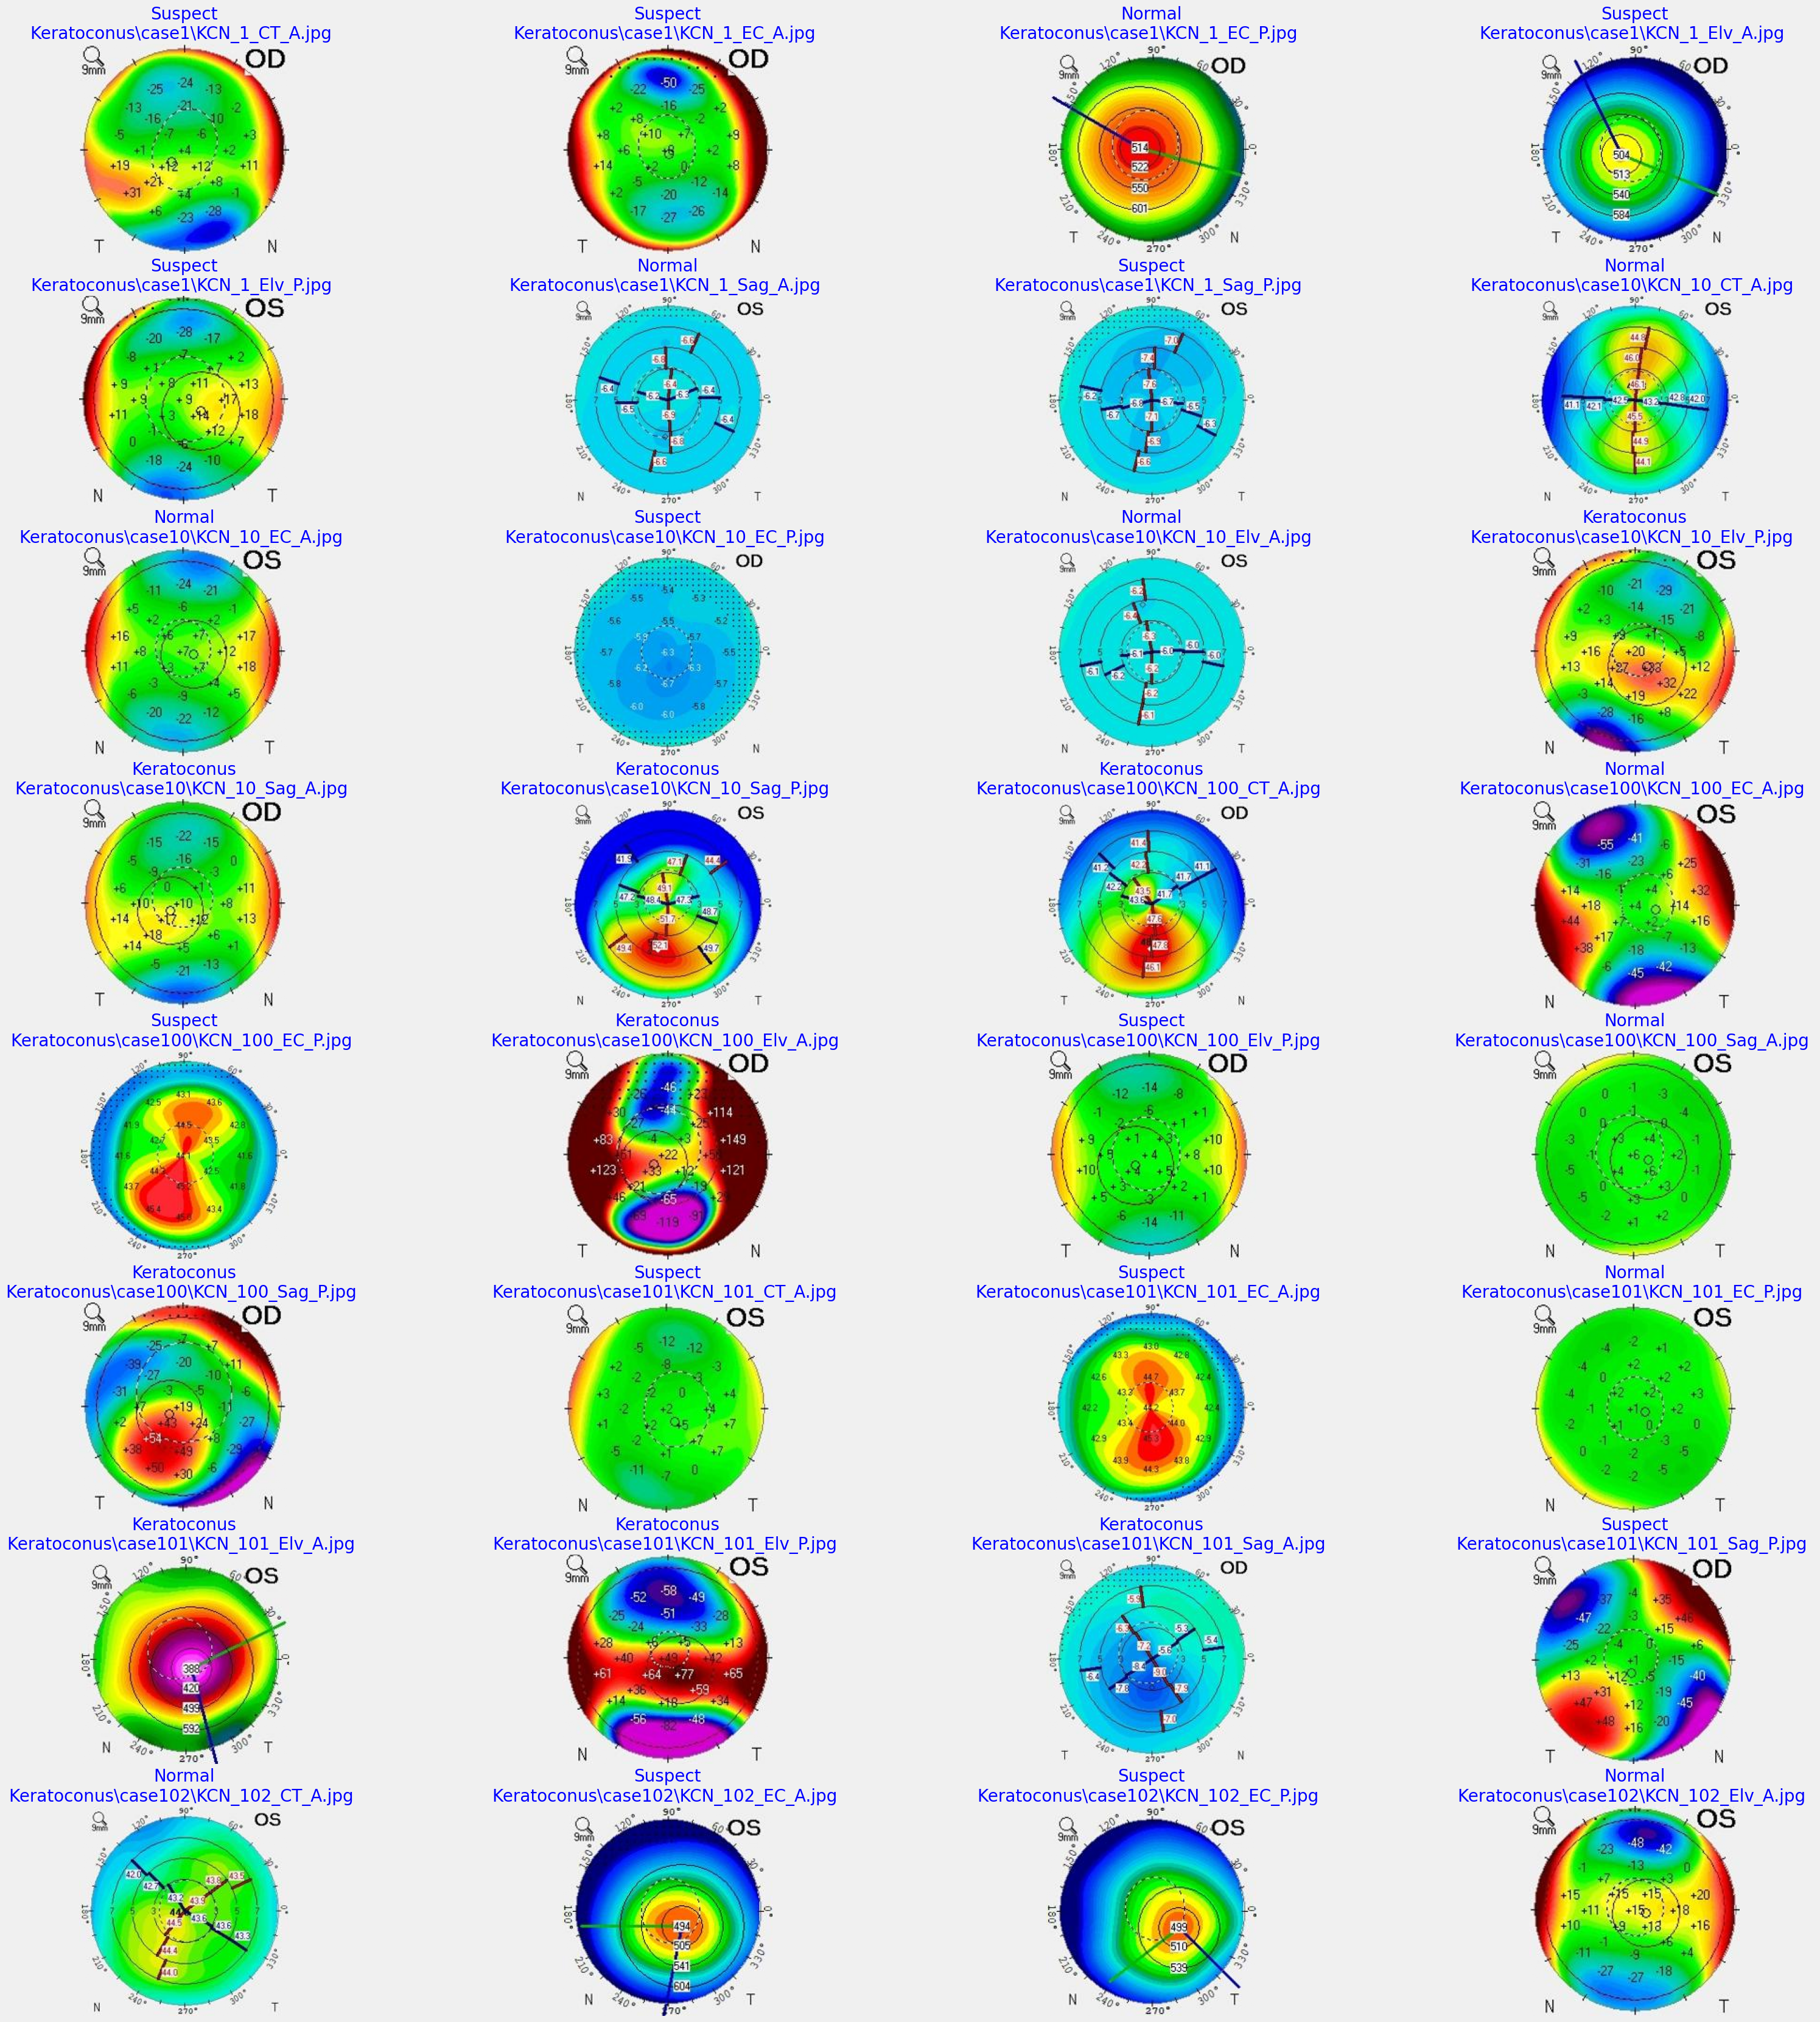

In [91]:
# Get the sample images, labels, and their filenames 
# To get the correct filename, turn off the shuffle
def plotImageWithNames(gen):
    images, labels = next(gen)
    filenames = gen.filenames
    classes = list(gen.class_indices.keys())
    
    plt.figure(figsize=(35, 40))
    length=len(labels)
    if length<32:   #show maximum of 40 images
        r=length
    else:
        r=32
    for i in range(r):        
        plt.subplot(8, 4, i + 1)
        image=images[i]/255 
        plt.imshow(image)
        index=npy.argmax(labels[i])
        class_name=classes[index]
        filename=gen.filenames[i]
        plt.title(label=f"{class_name}\n{filename} ", color='blue', fontsize=20)
        plt.axis('off')
    plt.show()

plotImageWithNames(validation_generator)

### Create the Models


In [92]:
from tensorflow import keras
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

# from tensorflow.keras import layers, optimizers, metrics, regularizers, models
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy


In [93]:
# define the image shape for the input layer
img_shape=(img_size[0], img_size[1], 3)
batch_size = batch_size
epochs=40
ask_epoch=25



In [94]:
# Train the model reporting different metrics
metrics = [
    # 'accuracy',
    keras.metrics.Accuracy(name="accuracy"),
    keras.metrics.Precision(name="Precision"),
    keras.metrics.Recall(name="Recall"),
    # keras.metrics.FalseNegatives(name="F-n"),
    # keras.metrics.FalsePositives(name="F-p"),
    # keras.metrics.TrueNegatives(name="T-n"),
    # keras.metrics.TruePositives(name="T-p"),
]


#### 5. Using Convolution Neural Network - 2-Dimension

In [95]:
# define the model architecture
cnn_model = Sequential(name='CNN')
cnn_model.add(Conv2D(32, (3, 3), name='conv2d_1', activation='relu', input_shape=img_shape))
cnn_model.add(MaxPooling2D((2, 2), name='max_pooling2d_1'))
cnn_model.add(Conv2D(64, (3, 3), name='conv2d_2', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2), name='max_pooling2d_2'))
cnn_model.add(Conv2D(128, (3, 3), name='conv2d_3', activation='relu'))
cnn_model.add(MaxPooling2D((2, 2), name='max_pooling2d_3'))
cnn_model.add(Flatten(name='flatten'))
cnn_model.add(Dense(512, name='dense_1', activation='relu'))
cnn_model.add(Dropout(0.5, name='dropout'))
cnn_model.add(Dense(class_count, name='output_layer_dense', activation='softmax'))

# compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# View the model summary
cnn_model.summary()


Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 128)      0       

In [96]:
# Plot the Model Diagram
set_config(display="diagram")

keras.utils.plot_model(cnn_model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### 6. Create a custom Keras callback to continue or halt training

In [97]:
# Code by https://www.kaggle.com/code/gpiosenka/callback-to-continue-or-halt-training-f1-90
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.subask_epoch = int(ask_epoch/2)
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)

#### 7. Instantiate custom callback and create callbacks to control learning rate and early stopping

In [98]:

ask=ASK(cnn_model, epochs,  ask_epoch)

check_point = tf.keras.callbacks.ModelCheckpoint(
                                          "models/best_conv2d_model.h5", 
                                          save_best_only=True, 
                                          monitor="val_accuracy"
    )

reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            # factor=0.5, 
                                            patience=2,
                                            verbose=1
                                            )

early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

callbacks = [
            check_point,
            reduce_learning, 
            early_stop, 
            ask
          ]

#### 8. Train the Model


In [99]:
model_history=cnn_model.fit(
                  train_generator,  
                  epochs=epochs, 
                  verbose=1, 
                  callbacks=callbacks,  
                  validation_data=validation_generator,
                #   validation_steps=None,  
                #   shuffle=True,  
                #   initial_epoch=0
                  )


Training will proceed until epoch 25  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/40
75/75 [==============================] - 107s 1s/step - loss: 58.5936 - accuracy: 0.4424 - val_loss: 1.0503 - val_accuracy: 0.4747 - lr: 0.0010
Epoch 2/40
75/75 [==============================] - 107s 1s/step - loss: 1.0540 - accuracy: 0.4247 - val_loss: 1.0993 - val_accuracy: 0.3581 - lr: 0.0010
Epoch 3/40
75/75 [==============================] - ETA: 0s - loss: 1.0970 - accuracy: 0.3580
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
75/75 [==============================] - 103s 1s/step - loss: 1.0970 - accuracy: 0.3580 - val_loss: 1.0903 - val_accuracy: 0.3834 - lr: 0.0010
Epoch 4/40
75/75 [==============================] - 106s 1s/step - loss: 1.0931 - accuracy: 0.3694 - val_loss: 1.0860 - val_accuracy: 0.3986 - lr: 1.0000e-04
Epoch 5/40
75/75 [==============================] - ETA: 

#### 9. Define a function to plot the training data


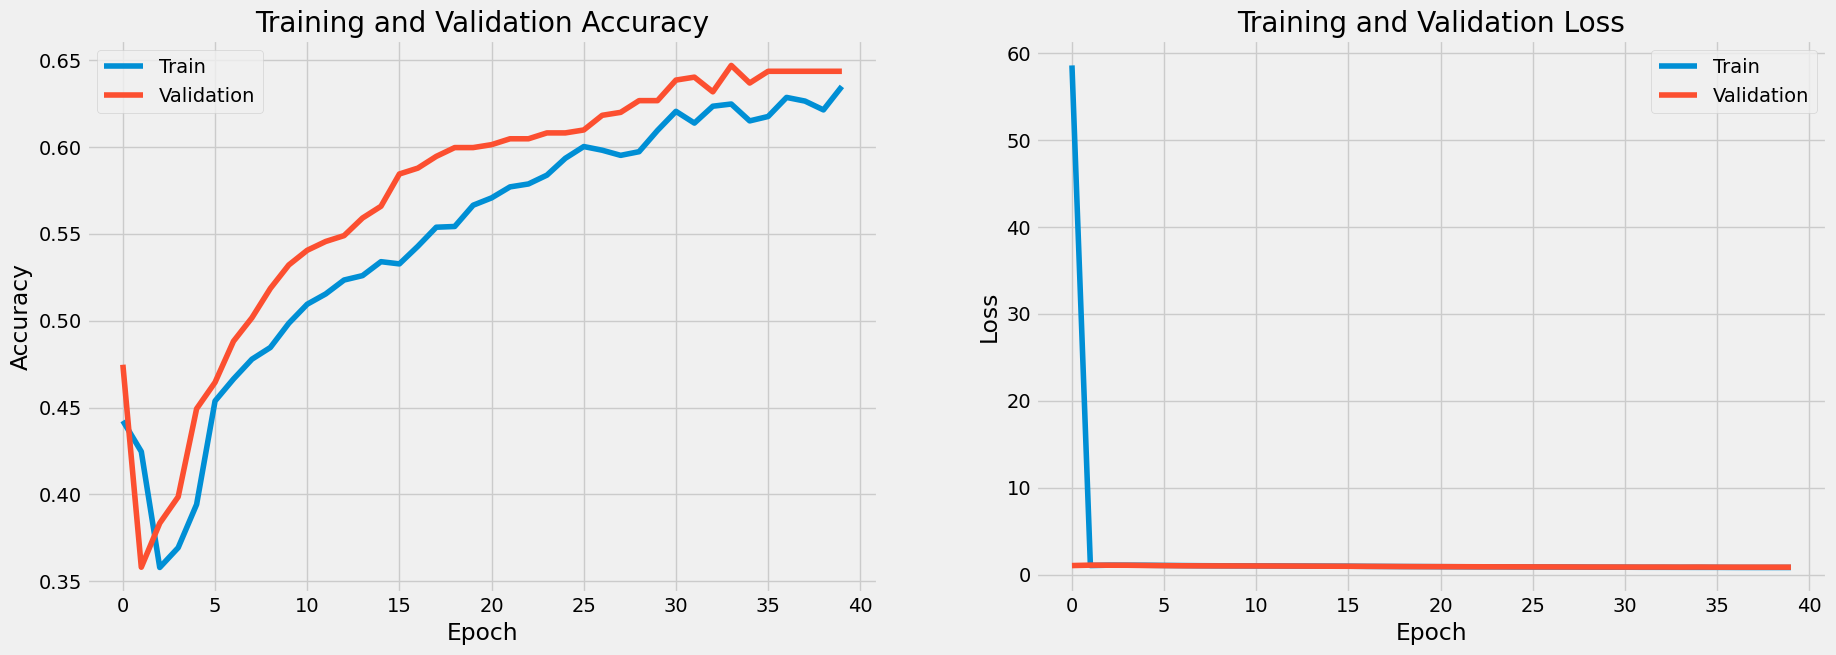

In [100]:
from pylab import rcParams
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
start_epoch = 0
Epoch_count=len(acc)+ start_epoch
Epochs=[]
for i in range (start_epoch ,Epoch_count):
    Epochs.append(i+1)   
index_loss=npy.argmin(val_loss)   #   this is the epoch with the lowest validation loss
val_lowest=val_loss[index_loss]
index_acc=npy.argmax(val_acc)


# summarize history for accuracy using reLU
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



# summarize history for loss using reLU
plt.subplot(2, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


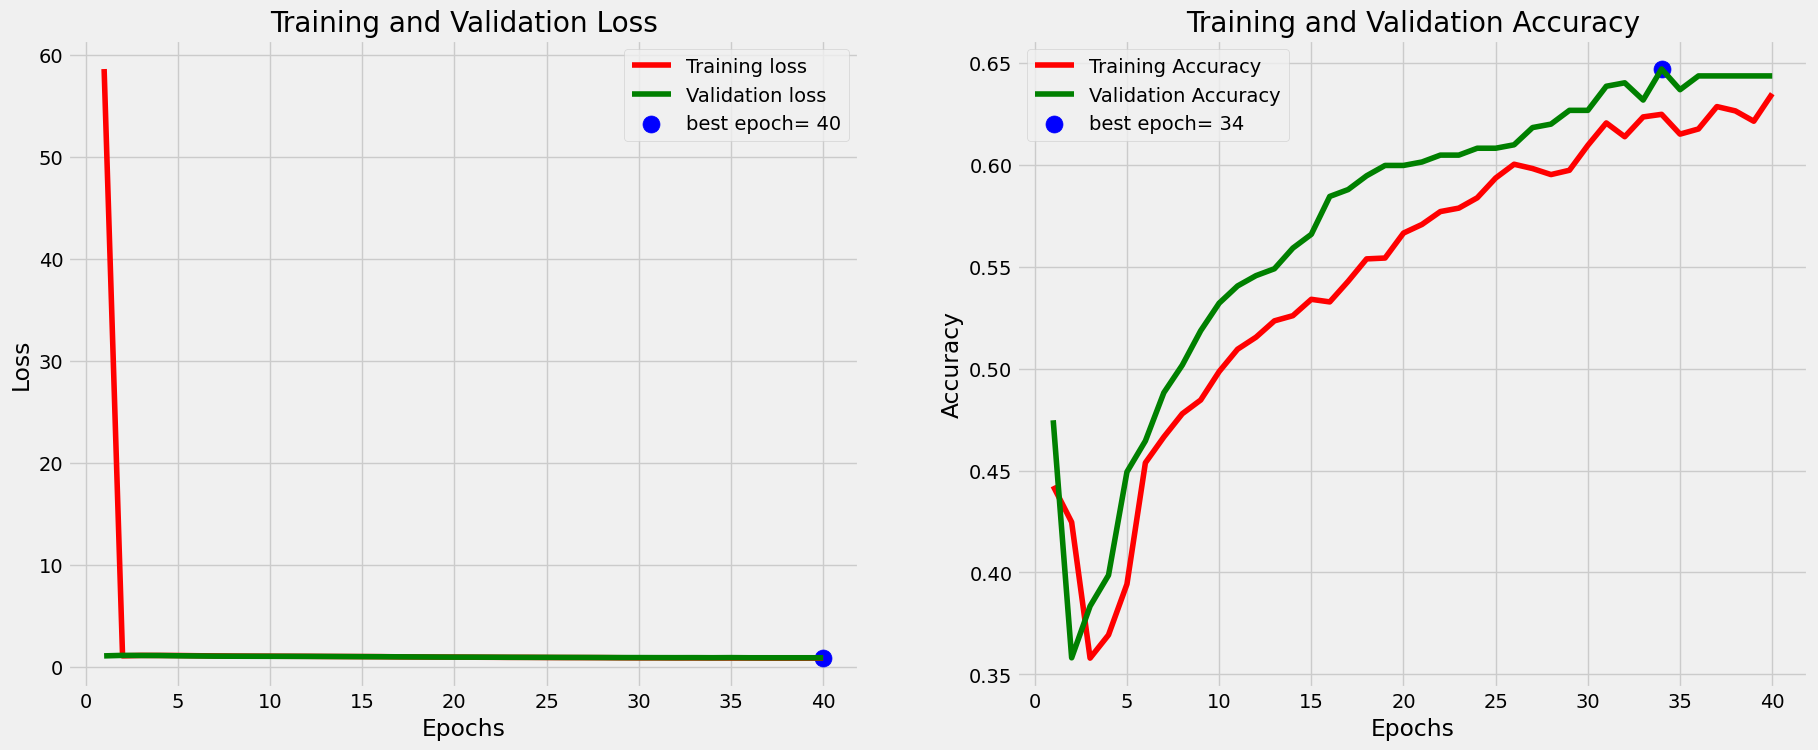

In [101]:
# Code by https://www.kaggle.com/code/gpiosenka/callback-to-continue-or-halt-training-f1-90
def trainValPlot(tr_data, start_epoch):
    # Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=npy.argmin(vloss)   #   this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=npy.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
trainValPlot(model_history,0)


#### 10. Evaluate the Model

In [102]:
# Evaluate the model - using the model

validation_images, validation_labels = next(validation_generator)
test_scores = cnn_model.evaluate(validation_images, validation_labels, verbose=2)
print("Validation loss:", test_scores[0])
print("Validation accuracy:", test_scores[1])

1/1 - 0s - loss: 0.7209 - accuracy: 0.6875 - 283ms/epoch - 283ms/step
Validation loss: 0.7208565473556519
Validation accuracy: 0.6875


In [103]:
# Load the saved model

from keras.models import load_model
my_model = load_model('models/best_conv2d_model.h5')


In [104]:
# Evaluate the model - using the saved model with Callback

validation_images, validation_labels = next(validation_generator)
test_scores = my_model.evaluate(validation_images, validation_labels, verbose=1)
print("Validation loss:", test_scores[0])
print("Validation accuracy:", test_scores[1])

1/1 [==============================] - 0s 499ms/step - loss: 1.0365 - accuracy: 0.5000
Validation loss: 1.0364785194396973
Validation accuracy: 0.5


#### 11. Save the Model

In [105]:
def save_model(wrong_predictions , total_predictions): 
    subject='keratoconus_model' 
    acc=str(( 1-wrong_predictions /total_predictions) * 100)
    index=acc.rfind('.')
    acc=acc[:index + 3]
    save_id= subject + '_' + str(acc) + '.h5' 
    model_save_loc=os.path.join('models', save_id)
    cnn_model.save(model_save_loc)
    print ('model was saved as ' , model_save_loc )
    # return model_save_loc
   

### Make Predictions on Test set, Create Confusion Matrix and Classification Report


In [106]:
# Function to Plot Confusion Matrix on the Test Set
def ConfusionMatrix(label_test, label_prep, class_count, class_keys, head = ''):
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(label_test, label_prep)
    accuracy = accuracy_score(label_test, label_prep)

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(npy.arange(class_count)+.5, class_keys, rotation=90)
    plt.yticks(npy.arange(class_count)+.5, class_keys, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix"+head)
    plt.show() 
    clr = classification_report(
                                label_test, 
                                label_prep, 
                                target_names=class_keys, 
                                digits= 4
                                ) # create classification report
    print(f"Classification Report {head}:\n---------------------------------------------\n", clr)

    print('accuracy: ', accuracy)


#### Batch Size Predictions

In [125]:
def ViewPredictionAndTestLabels(model, test_generator, batch_size):
    test_images, test_labels = next(test_generator)
    preds = model.predict(test_images)
    label_prep = npy.argmax(preds, axis = 1)
    label_test = npy.argmax(test_labels, axis = 1)
    correct_prediction = npy.sum((label_test == label_prep)*1)/batch_size
    print(label_prep)
    print(label_test)
    print('Correct Prediction:', correct_prediction)
    return label_test, label_prep

label_test, label_prep = ViewPredictionAndTestLabels(
                                                    model=cnn_model, 
                                                    test_generator=test_generator, 
                                                    batch_size=batch_size
                                                    )

1/1 [==============================] - 0s 281ms/step
[0 0 0 0 1 2 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0]
[0 0 0 1 1 0 0 1 1 1 1 0 1 2 2 0 0 2 0 2 1 2 0 2 1 0 0 1 1 1 0 2]
Correct Prediction: 0.59375


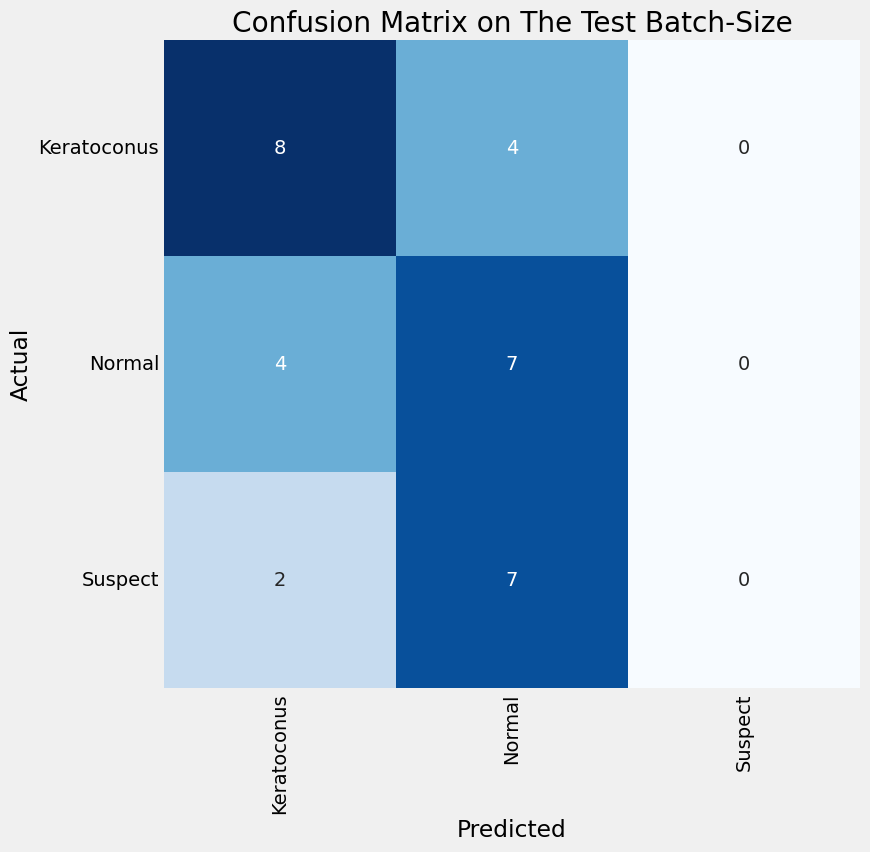

Classification Report  on The Test Batch-Size:
---------------------------------------------
               precision    recall  f1-score   support

 Keratoconus     0.5714    0.6667    0.6154        12
      Normal     0.3889    0.6364    0.4828        11
     Suspect     0.0000    0.0000    0.0000         9

    accuracy                         0.4688        32
   macro avg     0.3201    0.4343    0.3660        32
weighted avg     0.3480    0.4688    0.3967        32

accuracy:  0.46875


In [108]:
# Plot Confusion Matrix on the test batch-size 
ConfusionMatrix(
                label_test, 
                label_prep, 
                class_count, 
                class_keys,
                head=' on The Test Batch-Size'
                )

#### Test Set Predictions

33/33 [==============================] - 10s 290ms/step

726 out of 1050 tested images could not be detected properly given an accuracy of  30.86



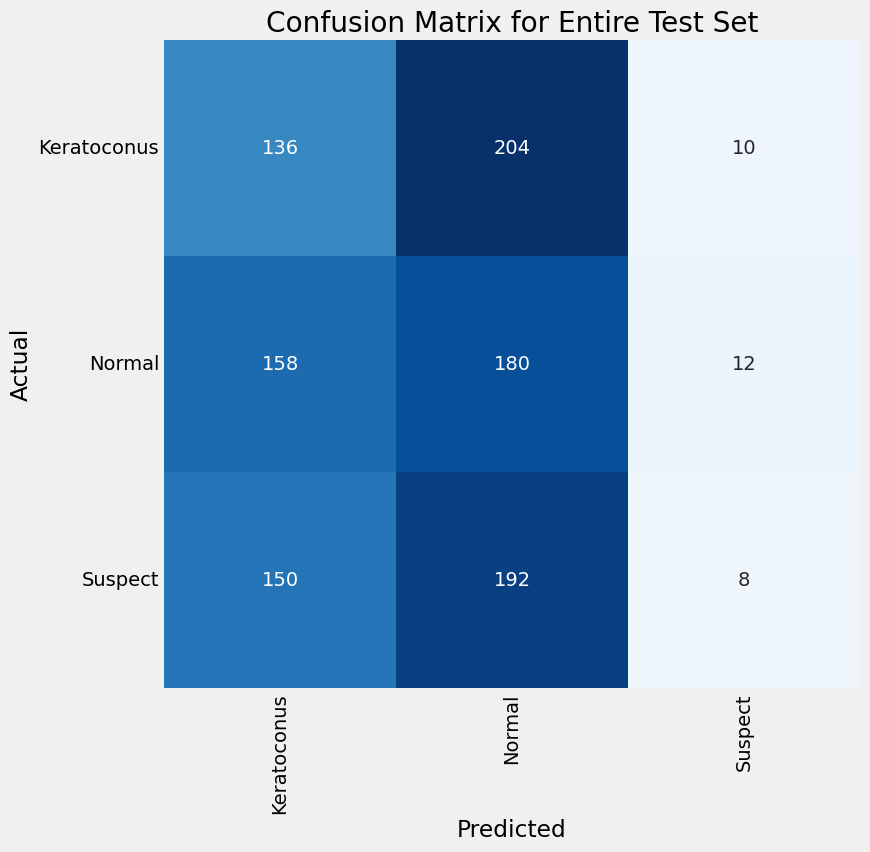

Classification Report  for Entire Test Set:
---------------------------------------------
               precision    recall  f1-score   support

 Keratoconus     0.3063    0.3886    0.3426       350
      Normal     0.3125    0.5143    0.3888       350
     Suspect     0.2667    0.0229    0.0421       350

    accuracy                         0.3086      1050
   macro avg     0.2952    0.3086    0.2578      1050
weighted avg     0.2952    0.3086    0.2578      1050

accuracy:  0.30857142857142855


In [109]:
# 
def ModelPredictionOnTestDataset(test_generator):
    y_pred= []
    y_label=test_generator.labels
    classes=list(train_generator.class_indices.keys())
    class_count=len(classes)
    wrong_predictions=0
    
    # predict on the test set
    preds=cnn_model.predict(test_generator) 
    
    total_predictions=len(preds)
    for i, p in enumerate(preds):
            pred_index=npy.argmax(p)  
            # labels are integer values       
            true_index=test_generator.labels[i]  
            if pred_index != true_index:       
                # a misclassification has occurred                                     
                wrong_predictions=wrong_predictions + 1
            y_pred.append(pred_index)
    acc=( 1-wrong_predictions/total_predictions) * 100
    print(f'\n{wrong_predictions} out of {total_predictions} tested images could not be detected properly given an accuracy of {acc:6.2f}\n')
    ypred=npy.array(y_pred)
    ytrue=npy.array(y_label)
    if class_count <=30:
        # Plot the confusion matrix
        ConfusionMatrix(
                        label_test=ytrue, 
                        label_prep=ypred, 
                        class_count=class_count, 
                        class_keys=class_keys, 
                        head=' for Entire Test Set'
                        )
        
    return wrong_predictions, total_predictions

wrong_predictions, total_predictions = ModelPredictionOnTestDataset(test_generator)

In [110]:
save_model(wrong_predictions , total_predictions)

model was saved as  models\keratoconus_model_30.85.h5


In [117]:
# # Recreate the exact same model purely from the file:
# model = keras.models.load_model("path_to_my_model")
from keras.models import load_model
my_model = load_model('models/best_conv2d_model.h5')

# evaluate the model
test_scores = my_model.evaluate(test_images, test_labels, verbose=1)
print("Test data loss:", test_scores[0])
print("Test data accuracy:", test_scores[1])

1/1 [==============================] - 0s 445ms/step - loss: 0.9263 - accuracy: 0.5938
Test data loss: 0.9263226985931396
Test data accuracy: 0.59375


### Plot the Predicted Images

1/1 [==============================] - 0s 236ms/step


KeyError: 2

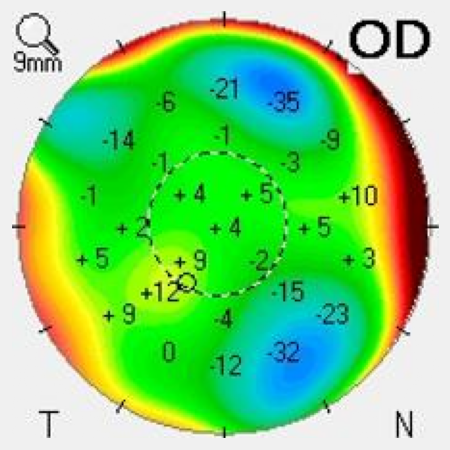

In [134]:
# Plot the Predicted Images
def plotPredictedImages(model, test_generator):
    test_images, test_labels = next(test_generator)
    
    preds = model.predict(test_images)
    label_prep = npy.argmax(preds, axis = 1)
    label_test = npy.argmax(test_labels, axis = 1)

    fig = plt.figure(figsize=(33, 50))
    # classes = train_generator.class_indices
    k = 0
    for i in range(32):
        ax = plt.subplot(8, 4, i+1)
        px = test_images[i]/255
        ax.imshow(px) #, cmap='Accent')
        ax.set_xticks([])
        ax.set_yticks([])
        
        if  class_dictionary[label_test[i]] == class_dictionary[label_prep[i]]:
            for spine in ['top','bottom','left','right']:
                ax.spines[spine].set_linewidth(10)
                ax.spines[spine].set_color('green')
            ax.set_title(
                        class_dictionary[label_prep[i]],
                        color='green', 
                        fontsize=40
                        )
        else:
            for spine in ['top','bottom','left','right']:
                ax.spines[spine].set_linewidth(10)
                ax.spines[spine].set_color('red')
            labels='Pred:'+class_dictionary[label_prep[i]]+" | Act:"+class_dictionary[label_test[i]],
            ax.set_title(
                        label=labels,
                        color='red', 
                        fontsize=35
                        )
        plt.tight_layout()
    
plotPredictedImages(cnn_model, test_generator)